In [1]:
import os

In [2]:
# use GPU 1
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [3]:
IMAGES_DIR = '/d2/caches/kaggle-planet/processed-images-64x64'
IMAGE_SHAPE = (64, 64, 4)
TEST_TIFFS_DIR = '/datasets/kaggle/planet/test-tif-v2'
MODEL = '/d2/caches/kaggle-planet/models/A/e14-l=0.21645-vl=0.53660.h5'
BATCH_SIZE = 128

In [4]:
%run 'Lib.ipynb'

In [5]:
import keras

Using TensorFlow backend.


In [6]:
X_files_pred = [x.split('.')[0] for x in list_files(TEST_TIFFS_DIR)]

In [7]:
# number of batches for prediction
import math
N_BATCHES = int(math.ceil(float(len(X_files_pred)) / float(BATCH_SIZE)))

In [8]:
model = keras.models.load_model(MODEL)

In [9]:
# map actual files to csv provided

test_mapping = pd.read_csv('/datasets/kaggle/planet/test_v2_file_mapping.csv')
import re

def map_file_v2(orig):
    fid = re.findall('\\d+', orig)[0]
    d = test_mapping[test_mapping['old'] == ('file_' + fid + '.tif')]
    if len(d) == 0: fid_new = fid
    else: fid_new = re.findall('\\d+', d['new'].values[0])[0]
    return ('file_' + fid_new + '.tif', 'test_' + fid_new + '.jpg')

In [51]:
classes_misc = np.load('out/classes_misc.npy').tolist()
classes_weather = np.load('out/classes_weather.npy').tolist()

i = 0

for f in tqdm(X_files_pred):
    assert(os.path.isfile(IMAGES_DIR + '/' + f))
    
    b=generate_batch(
            n_samples=1,
            batch_index=i,
            X_files=X_files_pred,
            Y_tags_misc=None,
            Y_tags_weather=None,
            images_dir=IMAGES_DIR,
            image_shape=IMAGE_SHAPE)
    
    p = model.predict_on_batch(b)
    
    tags = []
    
    tags_misc = p[0][0]
    tags_weather = p[1][0]
    
    # misc
    for j, v in enumerate(tags_misc):
        if v > 0.5: # cut-off
            tags.append(classes_misc[j])
    
    # weather
    tag_weather = classes_weather[np.argmax(tags_weather)]
    if 'unknown' != tag_weather: tags.append(tag_weather)
        
    print(f, tags, map_file_v2(f))
            
    i += 1

  0%|          | 67/61191 [00:00<03:06, 327.96it/s]

test_20789 ['primary', 'partly_cloudy'] ('file_20789.tif', 'test_20789.jpg')
test_19769 ['primary', 'clear'] ('file_6866.tif', 'test_6866.jpg')
file_3633 ['primary', 'clear'] ('file_9375.tif', 'test_9375.jpg')
test_28158 ['agriculture', 'primary', 'road', 'clear'] ('file_28158.tif', 'test_28158.jpg')
test_5378 ['primary', 'clear'] ('file_80.tif', 'test_80.jpg')
test_1015 ['agriculture', 'primary', 'road', 'clear'] ('file_5234.tif', 'test_5234.jpg')
test_29487 ['primary', 'clear'] ('file_29487.tif', 'test_29487.jpg')
file_11573 ['primary', 'water', 'clear'] ('file_8166.tif', 'test_8166.jpg')
test_7030 ['primary', 'partly_cloudy'] ('file_16179.tif', 'test_16179.jpg')
test_1362 ['primary', 'clear'] ('file_1109.tif', 'test_1109.jpg')
test_15379 ['primary', 'clear'] ('file_7165.tif', 'test_7165.jpg')
test_17045 ['primary', 'clear'] ('file_2723.tif', 'test_2723.jpg')
test_10596 ['agriculture', 'habitation', 'primary', 'road', 'partly_cloudy'] ('file_1688.tif', 'test_1688.jpg')
file_7834 ['ag

  0%|          | 131/61191 [00:00<03:11, 318.53it/s]

test_21175 ['primary', 'clear'] ('file_21175.tif', 'test_21175.jpg')
file_2427 ['agriculture', 'primary', 'road', 'partly_cloudy'] ('file_399.tif', 'test_399.jpg')
test_29948 ['primary', 'partly_cloudy'] ('file_29948.tif', 'test_29948.jpg')
test_10092 ['primary', 'clear'] ('file_5669.tif', 'test_5669.jpg')
test_40666 ['agriculture', 'primary', 'clear'] ('file_40666.tif', 'test_40666.jpg')
file_15630 ['primary', 'clear'] ('file_982.tif', 'test_982.jpg')
file_19289 ['agriculture', 'primary', 'water', 'clear'] ('file_1923.tif', 'test_1923.jpg')
test_14130 ['primary', 'partly_cloudy'] ('file_12273.tif', 'test_12273.jpg')
file_18628 ['primary', 'clear'] ('file_6694.tif', 'test_6694.jpg')
test_8968 ['agriculture', 'primary', 'road', 'clear'] ('file_7416.tif', 'test_7416.jpg')
file_10397 ['primary', 'clear'] ('file_9628.tif', 'test_9628.jpg')
test_8740 ['primary', 'clear'] ('file_1692.tif', 'test_1692.jpg')
test_17693 ['agriculture', 'primary', 'road', 'clear'] ('file_13828.tif', 'test_13828.

  0%|          | 193/61191 [00:00<03:16, 311.02it/s]

test_7317 ['agriculture', 'primary', 'road', 'water', 'clear'] ('file_4974.tif', 'test_4974.jpg')
file_13004 ['primary', 'clear'] ('file_13597.tif', 'test_13597.jpg')
file_11221 ['agriculture', 'primary', 'road', 'clear'] ('file_15951.tif', 'test_15951.jpg')
file_11272 ['primary', 'clear'] ('file_12875.tif', 'test_12875.jpg')
test_2406 ['primary', 'clear'] ('file_3374.tif', 'test_3374.jpg')
test_4879 ['primary', 'cloudy'] ('file_8372.tif', 'test_8372.jpg')
file_9359 ['primary', 'clear'] ('file_10993.tif', 'test_10993.jpg')
file_14347 ['primary', 'clear'] ('file_4221.tif', 'test_4221.jpg')
test_10481 ['primary', 'clear'] ('file_16565.tif', 'test_16565.jpg')
file_19076 ['primary', 'clear'] ('file_2815.tif', 'test_2815.jpg')
file_2117 ['primary', 'clear'] ('file_1871.tif', 'test_1871.jpg')
test_8834 ['primary', 'partly_cloudy'] ('file_1868.tif', 'test_1868.jpg')
test_34225 ['primary', 'water', 'clear'] ('file_34225.tif', 'test_34225.jpg')
test_29312 ['haze'] ('file_29312.tif', 'test_29312

  0%|          | 254/61191 [00:00<03:19, 305.13it/s]

test_11511 ['primary', 'clear'] ('file_18877.tif', 'test_18877.jpg')
file_4755 ['primary', 'clear'] ('file_18127.tif', 'test_18127.jpg')
file_2120 ['primary', 'clear'] ('file_835.tif', 'test_835.jpg')
test_34759 ['agriculture', 'primary', 'clear'] ('file_34759.tif', 'test_34759.jpg')
test_8919 ['primary', 'clear'] ('file_3336.tif', 'test_3336.jpg')
file_8932 ['agriculture', 'primary', 'road', 'clear'] ('file_13939.tif', 'test_13939.jpg')
file_15305 ['agriculture', 'primary', 'clear'] ('file_18149.tif', 'test_18149.jpg')
test_21560 ['primary', 'clear'] ('file_21560.tif', 'test_21560.jpg')
test_21247 ['agriculture', 'primary', 'clear'] ('file_21247.tif', 'test_21247.jpg')
test_12349 ['primary', 'clear'] ('file_13602.tif', 'test_13602.jpg')
test_24877 ['agriculture', 'primary', 'water', 'clear'] ('file_24877.tif', 'test_24877.jpg')
file_971 ['primary', 'clear'] ('file_14850.tif', 'test_14850.jpg')
test_35235 ['primary', 'clear'] ('file_35235.tif', 'test_35235.jpg')
test_36751 ['agricultur

  1%|          | 312/61191 [00:01<03:27, 293.82it/s]


test_30845 ['primary', 'clear'] ('file_30845.tif', 'test_30845.jpg')
file_1740 ['primary', 'clear'] ('file_2236.tif', 'test_2236.jpg')
test_36706 ['primary', 'haze'] ('file_36706.tif', 'test_36706.jpg')
test_28900 ['agriculture', 'primary', 'road', 'clear'] ('file_28900.tif', 'test_28900.jpg')
test_20585 ['primary', 'road', 'water', 'clear'] ('file_20585.tif', 'test_20585.jpg')
test_36650 ['primary', 'clear'] ('file_36650.tif', 'test_36650.jpg')
test_28963 ['agriculture', 'habitation', 'primary', 'road', 'clear'] ('file_28963.tif', 'test_28963.jpg')
test_8904 ['agriculture', 'primary', 'road', 'clear'] ('file_1503.tif', 'test_1503.jpg')
test_7 ['agriculture', 'habitation', 'primary', 'road', 'clear'] ('file_14348.tif', 'test_14348.jpg')
test_6546 ['primary', 'clear'] ('file_17880.tif', 'test_17880.jpg')
file_4521 ['primary', 'clear'] ('file_16430.tif', 'test_16430.jpg')
test_1131 ['primary', 'haze'] ('file_5808.tif', 'test_5808.jpg')
file_18883 ['primary', 'clear'] ('file_2308.tif', '

  1%|          | 341/61191 [00:01<03:29, 290.11it/s]

file_14224 ['primary', 'clear'] ('file_8505.tif', 'test_8505.jpg')
file_10430 ['primary', 'clear'] ('file_3141.tif', 'test_3141.jpg')
file_3212 ['primary', 'cloudy'] ('file_20227.tif', 'test_20227.jpg')
file_7938 ['primary', 'water', 'clear'] ('file_8205.tif', 'test_8205.jpg')
test_36356 ['primary', 'clear'] ('file_36356.tif', 'test_36356.jpg')
file_19915 ['primary', 'clear'] ('file_4147.tif', 'test_4147.jpg')
test_4429 ['agriculture', 'primary', 'clear'] ('file_15506.tif', 'test_15506.jpg')
test_30523 ['primary', 'partly_cloudy'] ('file_30523.tif', 'test_30523.jpg')
test_32763 ['primary', 'clear'] ('file_32763.tif', 'test_32763.jpg')
test_13482 ['primary', 'clear'] ('file_1513.tif', 'test_1513.jpg')
file_15534 ['primary', 'clear'] ('file_14387.tif', 'test_14387.jpg')
test_39520 ['bare_ground', 'primary', 'road', 'clear'] ('file_39520.tif', 'test_39520.jpg')
file_15315 ['agriculture', 'habitation', 'primary', 'road', 'clear'] ('file_3178.tif', 'test_3178.jpg')
file_2101 ['primary', 'cl

  1%|          | 399/61191 [00:01<03:32, 286.52it/s]

test_36734 ['primary', 'haze'] ('file_36734.tif', 'test_36734.jpg')
test_12081 ['primary', 'clear'] ('file_9131.tif', 'test_9131.jpg')
test_11340 ['primary', 'partly_cloudy'] ('file_2163.tif', 'test_2163.jpg')
test_30921 ['primary', 'clear'] ('file_30921.tif', 'test_30921.jpg')
test_23741 ['primary', 'clear'] ('file_23741.tif', 'test_23741.jpg')
file_2428 ['primary', 'clear'] ('file_19756.tif', 'test_19756.jpg')
test_7414 ['agriculture', 'primary', 'water', 'clear'] ('file_16350.tif', 'test_16350.jpg')
test_9298 ['agriculture', 'primary', 'partly_cloudy'] ('file_13630.tif', 'test_13630.jpg')
file_6605 ['primary', 'clear'] ('file_16667.tif', 'test_16667.jpg')
test_23616 ['agriculture', 'primary', 'clear'] ('file_23616.tif', 'test_23616.jpg')
test_23826 ['agriculture', 'habitation', 'primary', 'road', 'clear'] ('file_23826.tif', 'test_23826.jpg')
test_23184 ['primary', 'clear'] ('file_23184.tif', 'test_23184.jpg')
file_15066 ['primary', 'clear'] ('file_13702.tif', 'test_13702.jpg')
file_

KeyboardInterrupt: 

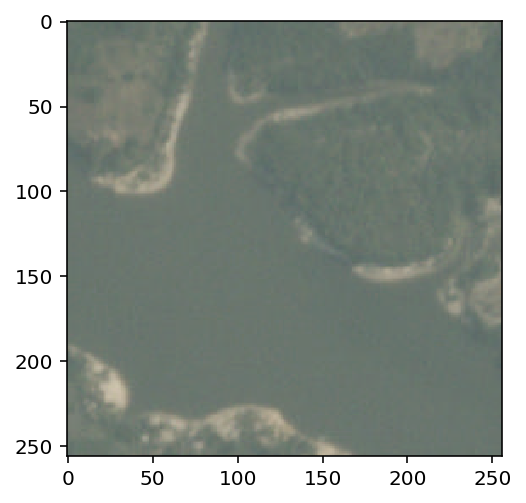

In [54]:
plt.imshow(plt.imread('/datasets/kaggle/planet/test-jpg/test_16364.jpg'))